# A 
_18 points_

`samples.npy` holds 100 samples. 50 of it were part of training set `1` of `model1.hdf5` and 50 were part of training set `2` of `model2.hdf5`. 

- For each sample, identfiy which training set this sample was part of. Note, you probably will not be 100% certain - an educated guess is fine. 
- If you cannot make an educated guess for a sample explain why. It may not be possible to identify each sample!
- Explain and argue, why you think samples are part of which training set.
- Please provide a list with 100 labels ('1' / '2') indicating the training set you think the respective label was part of. Please use the same order than `samples.npy`.

You are free to use any technique to help you in your identification. Please indicate what exactly you did and explain your thinking. You are free to use any information available to you. This includes: 

- self trained models from previous excercises
- models you found online
- the MNIST dataset including labels

### Import of all neccessary pakets

In [81]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt

### Load the samples, models and MNIST data

In [82]:
samples = np.load("samples.npy")

model_1 = keras.models.load_model("model1.hdf5")
model_2 = keras.models.load_model("model2.hdf5")

# train/test ist egal
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
X_data = np.concatenate([X_train, X_test])
Y_data = np.concatenate([Y_train, Y_test])

In order to be able to compare the samples with the MNIST data set later, we need to reshape the samples a bit.

Only then can we compare the MNIST data with the array:

In [83]:
samples_reshape = (samples[:, :, :, 0] * 255).astype(int)

In [84]:
data = []
for sample in samples_reshape:
    found = False
    idx = 0
    for x in X_data:
        if np.array_equal(sample, x):
            found = True
            data.append({
                "label": Y_data[idx],
                "image": sample
            })
            continue
        idx += 1
for t in range(len(data)):
    data[t]["idx"] = t

After reshaping and comparing, I will now let the models predict:

In [85]:
pred_model1 = model_1.predict(samples)
pred_model2 = model_2.predict(samples)


In order to be able to judge the assignment later correctly, I will add and save the following structure for each image after the prediction:

In [86]:
"""
Data-Structure:
{
    id:              saves which of the model predict right (b: both, n: none, 1, 2)
    modelnumber:     saves the best model (e: equal, 1, 2)
    label:           saves the MNIST label
    image:           saves the image
    score_model_1:   saves the rate of model 1
    score_model_2:   saves the rate of model 2
    final_result:    will be used to get the final result.
}
"""

'\nData-Structure:\n{\n    id:              saves which of the model predict right (b: both, n: none, 1, 2)\n    modelnumber:     saves the best model (e: equal, 1, 2)\n    label:           saves the MNIST label\n    image:           saves the image\n    score_model_1:   saves the rate of model 1\n    score_model_2:   saves the rate of model 2\n    final_result:    will be used to get the final result.\n}\n'

### How does it works:

* If only one model has predicted the image correctly, I store for the image in the data structure under id: either 1 for model 1 or 2 for model 2.

* If both have predicted the image correctly, I store it under id = 3. 

* In order to compare the two model predictions, we additionally store the score/accuracy.

* If it should come to the fact that both models are equal, this behaviour is noted under modelnumber = equal.

* If both models have made a wrong prediction, this is noted under id = 0.

 * We need an additional field, which describes which model was better for the respective picture. For this I use final_result. 

In [87]:
for i in range(len(samples)):
    model_1_value_index = np.argsort(pred_model1[i])[len(pred_model1[i]) - 1]
    model_2_value_index = np.argsort(pred_model2[i])[len(pred_model2[i]) - 1]
    data_ex = {
        "id": "n",
        "modelnumber": None,
        "score_model_1": None,
        "score_model_2": None,
    }
    if model_1_value_index != data[i]["label"] and model_2_value_index != data[i]["label"]:
        data_ex["id"] = "n"
    elif model_1_value_index == data[i]["label"] != model_2_value_index:
        data_ex["id"] = 1
        data_ex["final_result"] = 1
        data_ex["modelnumber"] = 1
        data_ex["score_model_1"] = pred_model1[i][model_1_value_index]
    elif model_2_value_index == data[i]["label"] != model_1_value_index:
        data_ex["id"] = 2
        data_ex["final_result"] = 2
        data_ex["modelnumber"] = 2
        data_ex["score_model_2"] = pred_model2[i][model_2_value_index]
    elif pred_model1[i][model_1_value_index] == pred_model2[i][model_2_value_index]:
        data_ex["id"] = "b"
        data_ex["modelnumber"] = "e"
        data_ex["score_model_1"] = pred_model1[i][model_1_value_index]
        data_ex["score_model_2"] = pred_model2[i][model_2_value_index]
    else:
        data_ex["id"] = "b"
        data_ex["modelnumber"] = 1 if pred_model1[i][model_1_value_index] > pred_model2[i][model_2_value_index] else 2
        data_ex["final_result"] = 1 if pred_model1[i][model_1_value_index] > pred_model2[i][model_2_value_index] else 2
        data_ex["score_model_1"] = pred_model1[i][model_1_value_index]
        data_ex["score_model_2"] = pred_model2[i][model_2_value_index]
    data[i] = {**data[i], **data_ex}

### Analyze the Validation of Prediction

In [88]:
# initialzing all needed variables
model_1 = 0
model_2 = 0
none_of_them = 0
both_of_them = 0
MONE = 0 
MTWO = 0
EQUALS = 0

In [89]:
# count upwards if a case is occupied
for entry in data:
    if entry["id"] == 1:
        model_1 = model_1 +  1
        MONE = MONE + 1
    elif entry["id"] == 2:
        model_2 = model_2 + 1
        MTWO = MTWO + 1
    elif entry["id"] == "n":
        none_of_them = none_of_them + 1
    elif entry["id"] == "b":
        both_of_them = both_of_them + 1
        if entry["modelnumber"] == 1:
            MONE = MONE + 1
        elif entry["modelnumber"] == 2:
            MTWO = MTWO + 1
        elif entry["modelnumber"] == "e":
            EQUALS = EQUALS +  1



In [90]:
print("Amount of Model 1: "+str(model_1))
print("Amount of Model 2: "+str(model_2))
print("Amount of both right: "+str(both_of_them))
print("Amount of none right: "+str(none_of_them))
print("______________________________________________________________")
print("Model 1:" + str(MONE))
print("Model 2:" + str(MTWO))


Amount of Model 1: 7
Amount of Model 2: 8
Amount of both right: 85
Amount of none right: 0
______________________________________________________________
Model 1:32
Model 2:68


You can clearly see that some images were correctly predicted by both, some images were correctly predicted by only one model and no image was correctly predicted by any model. 

I will now proceed in the following way, that I assign the image that was predicted with higher certainty/accuracy to the model and for all images that were predicted by only one model, I assign them directly.

As a result there are much more images in model 2.

Now it is a matter of getting a possible 50/50 split. 

I have thought about the following:

First, both models must have predicted the image correctly, furthermore model 2 must have predicted the corresponding image with a higher accuracy than model 1.

Then, for each image that fulfils these two conditions, a result is obtained by subtracting from 1 the accuracy of model 2 and adding the accuracy of model 2.  Because I assume that the lower the accuracy of model 1, the higher the score of model 2 for an image!
This is the basis for the allocation of surplus images from model 2 to model 1.



In [92]:
for (i, entry) in enumerate(data):
    if entry["id"] != "b" or (entry["id"] == "b" and entry["score_model_1"] > entry["score_model_2"]):
        continue
    data[i]["score"] =  entry["score_model_1"] - entry["score_model_2"]

data.sort(key=lambda entry: entry["score"] if "score" in entry.keys() else 0, reverse=True)


 sorting the data list reverse

In [93]:
for i in range(18):
    data[i]["final_result"] = 1


data.sort(key=lambda entry: entry["idx"])

Here the Result: 

In [94]:
print([entry["final_result"] for entry in data])

[2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2]


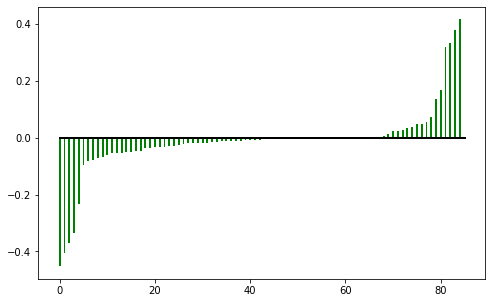

In [95]:
score_array = [entry["score_model_1"] - entry["score_model_2"] for entry in data if entry["id"] == "b" and entry["modelnumber"] != "e"]

mods_diff_rel_sort = np.argsort(score_array)
fig, (ax2) = plt.subplots(1, 1)
fig.set_size_inches(8, 5)
width = 0.4

for rank, diff_i in enumerate(mods_diff_rel_sort):  
    rel_diff = score_array[diff_i]
    ax2.bar(rank, rel_diff, width, align='center', color = 'gr')   
    ax2.plot([0, 85], [0, 0], 'k-')


# ______________________________________________________________

# B
_7 points_

Both training sets `1` and `2` were unbalanced. 

- What can you infer about the training set's imbalances?

You are free to use any technique to help you in your identification. Please indicate what exactly you did and explain your thinking. You are free to use any information available to you. This includes: 

- self trained models from previous excercises
- models you found online
- the MNIST dataset including labels

First i defined an "Array"for all 9 numbers, where I can count who has right predicted:

In [96]:
model_1_ri = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
model_1_wr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
model_2_ri = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
model_2_wr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

After that, i will iterate through the data list, where which model is right and count the "Array" above up. I do this, to get a nice "table" or overview how each model is working on the set

* If both are right, i will count up model_1_ri and model_2_ri

* If model_1 is right, i will count up model_1_ri and reduce model_2_wr

* If model_2 is right, i will count up model_2_ri and reduce model_1_wr

In [97]:
for entry in data:
    
    if entry["id"] == "b":
        model_1_ri[entry["label"]] = model_1_ri[entry["label"]] + 1
        model_2_ri[entry["label"]] = model_2_ri[entry["label"]] + 1
    elif entry["id"] == 1:
        model_1_ri[entry["label"]] = model_1_ri[entry["label"]] + 1
        model_2_wr[entry["label"]] = model_2_wr[entry["label"]] - 1
    elif entry["id"] == 2:
        model_2_ri[entry["label"]] = model_2_ri[entry["label"]] + 1
        model_1_wr[entry["label"]] = model_1_wr[entry["label"]] - 1

Now, i will read all unique labels from ar Data list (Dataset)

In [98]:
(labels, l_counts) = np.unique([entry["label"] for entry in data], return_counts=True)

In [99]:
label_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [100]:
for i in range(len(labels)):
    label_counts[labels[i]] = l_counts[i]

### Get a graph for Model 1

to show on which number the model has some errors and of course, on which the model perfoms good:

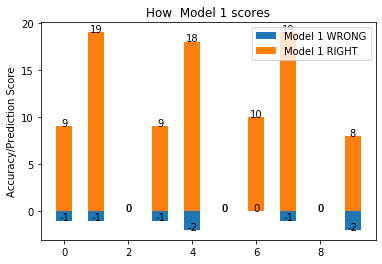

In [101]:
bar_labels = range(10)
fig, ax = plt.subplots()
width = 0.5
one = ax.bar(bar_labels, model_1_wr, width, label='Model 1 WRONG')
two = ax.bar(bar_labels, model_1_ri, width, label='Model 1 RIGHT')
ax.set_ylabel('Accuracy/Prediction Score')
ax.set_title('How  Model 1 scores')
ax.legend()

def create (rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),ha='center')


autolabel(one)
autolabel(two)

### Get a graph for Model 2


to show on which number the model has some errors and of course, on which the model perfoms good:

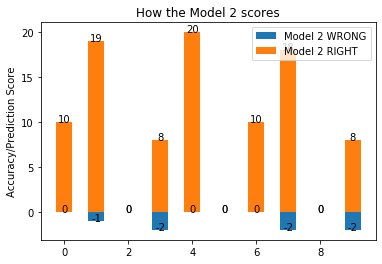

In [102]:
fig, ax = plt.subplots()
width = 0.5
one = ax.bar(bar_labels, model_2_wr, width, label='Model 2 WRONG')
two = ax.bar(bar_labels, model_2_ri, width, label='Model 2 RIGHT')

ax.set_ylabel('Accuracy/Prediction Score')
ax.set_title('How the Model 2 scores')
ax.legend()

create(one)
create(two)

Both models have almost the same values, i.e. they are equally efficient or equally good in terms of the data set. We cannot see peaks or valleys, so there are RELATIVELY few false predictions. Model 2 has some false predictions at 9, 7, 3 and 2, while Model 1 has some at 0,1,3,4,7,9. For model 1 the number of different numbers predicted was higher. (4 for model 2 vs. 6 for model 1) 

Why do some numbers perform worse than others? I suppose that e.g. model 2 does not have enough samples of the number 9 in the set, so there are more errors. The same applies to 3.

Probably the numbers are not well distributed in the set and as we can see in both graphs, number 2, 5 and 8 are missing in the set! 

# ______________________________________

# C

_5 points_

- Describe challenges you faced in A and B and how you solved it.

I came across the first big Challange when I got used to the topic again. The time after the last ML lecture and the beginning of the assignment was just too long. Maybe I should have solved at least A and B before the exam phase, but maybe this could have cost me valuable points in other exams ^^.

### to A:
At the beginning it was difficult for me to find an introduction to the topic. I wanted to have a look at the samples first, but it soon became clear that it's probably not possible. 
Due to discussion with ohter collegues it helps me to get a good overview and get some solutionplans... By trying to use the prediction Accuracy to trace back to which model the sample belongs, I was finally able to list it in a comprehensible way...

### to B:

At first I didn't know how to show the imbalance of the labels. I tried to show the it as graph, but I just didn't succeed. I constantly received errors and then looked for another way. In the end, I simply looked at the data for which the models predicted incorrectly and then visually displayed the result. It was my PLAN B so, i decided to use this way..


Discussion with other mates helps me really to bring me forward, because in a discussion, it is possible to change a plan to a solution and get some new input and views from the others.